### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint

### Importing data

In [2]:
telcom = pd.read_csv('churn.csv')
pd.set_option('display.max_columns', telcom.shape[1])
telcom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Data overview

In [3]:
print('Rows: {}'.format(telcom.shape[0]))
print('Columns: {}\n'.format(telcom.shape[1]))
print('Features:')
pprint(list(telcom.columns))
print('\nMissing values: {}'.format(telcom.isnull().sum().values.sum()))
print('\nUnique values: {}'.format(telcom.nunique()))

Rows: 7043
Columns: 21

Features:
['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Missing values: 0

Unique values: customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [4]:
def print_uniques(include_tenure=False):
    print('Feature:')
    tenure = 'tenure' if not include_tenure else ''
    for column in telcom.columns:
        if not column in ['customerID', 'MonthlyCharges', 'TotalCharges', tenure]:
            print('\t{} unique: {}'.format(column, telcom[column].unique()))

print_uniques()

Feature:
	gender unique: ['Female' 'Male']
	SeniorCitizen unique: [0 1]
	Partner unique: ['Yes' 'No']
	Dependents unique: ['No' 'Yes']
	PhoneService unique: ['No' 'Yes']
	MultipleLines unique: ['No phone service' 'No' 'Yes']
	InternetService unique: ['DSL' 'Fiber optic' 'No']
	OnlineSecurity unique: ['No' 'Yes' 'No internet service']
	OnlineBackup unique: ['Yes' 'No' 'No internet service']
	DeviceProtection unique: ['No' 'Yes' 'No internet service']
	TechSupport unique: ['No' 'Yes' 'No internet service']
	StreamingTV unique: ['No' 'Yes' 'No internet service']
	StreamingMovies unique: ['No' 'Yes' 'No internet service']
	Contract unique: ['Month-to-month' 'One year' 'Two year']
	PaperlessBilling unique: ['Yes' 'No']
	PaymentMethod unique: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
	Churn unique: ['No' 'Yes']


### Manipulating the data

In [5]:
# Total charges should be float too
telcom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Replacing missing data with nan
telcom['TotalCharges'] = telcom['TotalCharges'].replace(' ', np.nan)

# Dropping 0.15% of the missing data 
telcom = telcom[telcom['TotalCharges'].notnull()]
telcom = telcom.reset_index(drop=True)

telcom['TotalCharges'] = telcom['TotalCharges'].astype(float)


# Replace 'No internet service' to No
replace_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV', 
    'StreamingMovies'
]
for col in replace_cols : 
    telcom[col]  = telcom[col].replace({'No internet service' : 'No'})
    
# Make SeniorCitizen more readable
telcom['SeniorCitizen'] = telcom['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Group tenures 
def group_tenures(df):    
    if df['tenure'] <= 12:
        return 'Tenure_0-12'
    elif df['tenure'] > 12 and df['tenure'] <= 25:
        return 'Tenure_12-25'
    elif df['tenure'] > 25 and df['tenure'] <= 48:
        return 'Tenure_25-48'
    elif df['tenure'] > 48 and df['tenure'] <= 60:
        return 'Tenure_48-60'
    elif df['tenure'] > 60 :
        return 'Tenure_gt_60'
    
telcom['tenure_group'] = telcom.apply(lambda row: group_tenures(row), axis = 1)

churn_df = telcom[telcom['Churn'] == 'Yes']
not_churn_df = telcom[telcom['Churn'] == 'No']

In [7]:
print('\nUnique values: {}'.format(telcom.nunique()))


Unique values: customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_group           5
dtype: int64


### Analysing data

In [8]:
def make_bar_plot(data, show=True, tilted=False, axis=None, desc=None):
    print()
    if not axis:
        fig, axis = plt.subplots(1, 1, figsize=(8, 6))
    else:
        fig = None
    
    if desc:
        axis.set_title(desc)
    else:
        axis.set_title('"{}" distribution in data'.format(data.name))
        
    total = float(len(data))
    
    g = sns.countplot(data, palette='husl', ax=axis, order=sorted(data.unique()), edgecolor='black')
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height*1.02,
                '{:1.2f}%'.format(height/total*100),
                ha="center") 
    if tilted:
        axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
    if show:
        plt.show()
    else:
        if fig:
            plt.close(fig)
            return fig
     
    
def compare_two(feature1, feature2,desc_main, desc1=None, desc2=None, tilted=False):
    fig, ax =plt.subplots(1,2, figsize=(10, 6))
    
    make_bar_plot(feature1, show=False, tilted=tilted, desc=desc1, axis=ax[0])
    make_bar_plot(feature2, show=False, tilted=tilted, desc=desc2, axis=ax[1])
    fig.suptitle(desc_main)
    
    plt.show()

### Categorical

#### Churn on its own

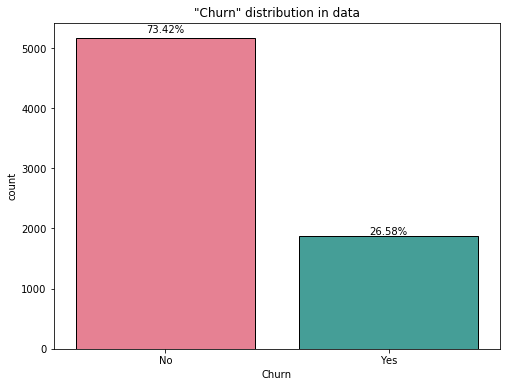

In [9]:
# Looks like the churn status is not balanced very well
make_bar_plot(telcom['Churn'], show=False)

#### Genders per churn status

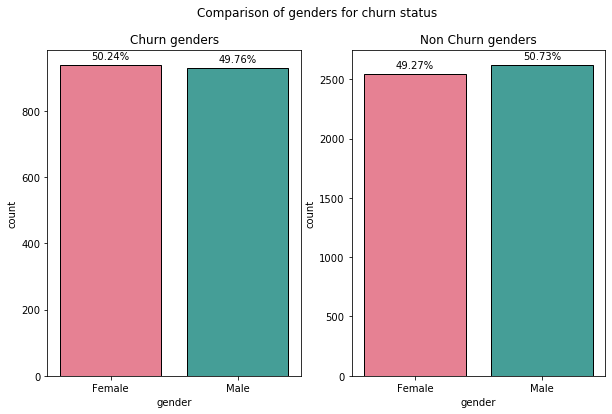

In [10]:
# the gender distriubutions within churn status looks pretty much the same
compare_two(
    telcom['gender'].loc[telcom['Churn'] == 'Yes'],
    telcom['gender'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of genders for churn status',
    desc1='Churn genders',
    desc2='Non Churn genders'
)

#### SeniorCitizen per churn status

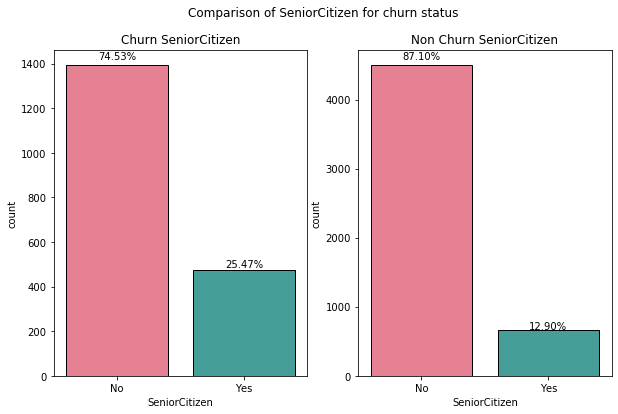

In [11]:
# Here we can see that we have twice as much Senior Citizens in Churn status
compare_two(
    telcom['SeniorCitizen'].loc[telcom['Churn'] == 'Yes'],
    telcom['SeniorCitizen'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of SeniorCitizen for churn status',
    desc1='Churn SeniorCitizen',
    desc2='Non Churn SeniorCitizen'
)

#### Partner per churn status

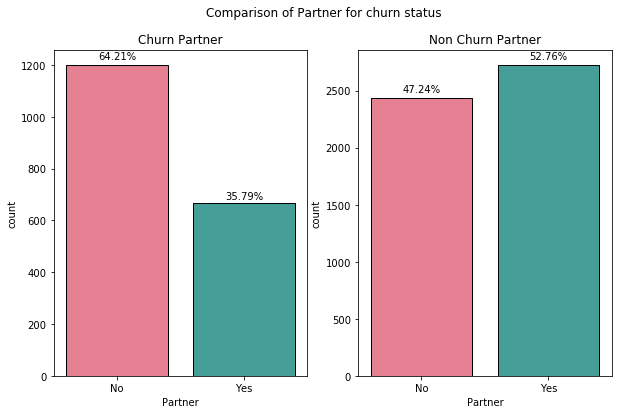

In [12]:
# here we can see that people with Churn status have less partners
compare_two(
    telcom['Partner'].loc[telcom['Churn'] == 'Yes'],
    telcom['Partner'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of Partner for churn status',
    desc1='Churn Partner',
    desc2='Non Churn Partner'
)

#### Dependents per churn status

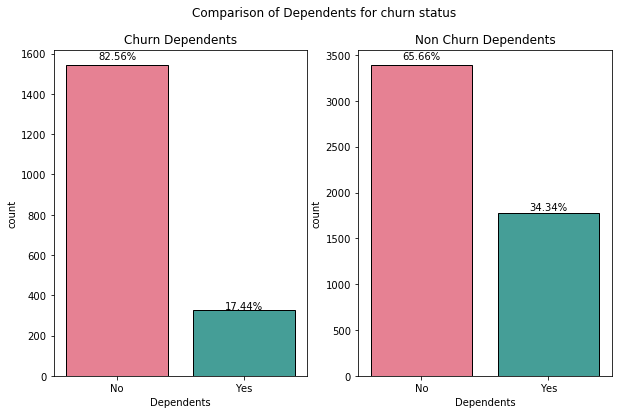

In [13]:
# here we can see that people with Churn status have less dependents
compare_two(
    telcom['Dependents'].loc[telcom['Churn'] == 'Yes'],
    telcom['Dependents'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of Dependents for churn status',
    desc1='Churn Dependents',
    desc2='Non Churn Dependents'
)

#### PhoneService per churn status

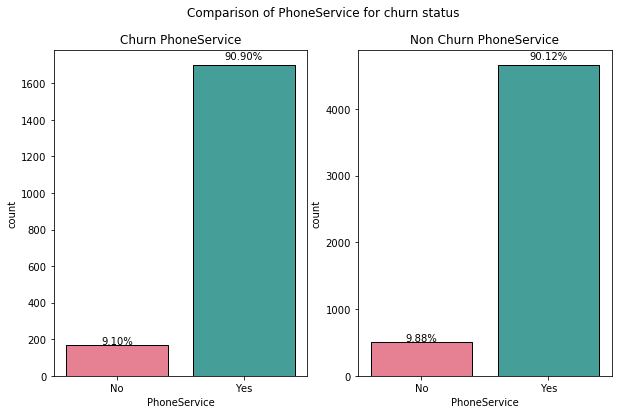

In [14]:
# here we can see that the distributions of PhoneService are pretty much the same
compare_two(
    telcom['PhoneService'].loc[telcom['Churn'] == 'Yes'],
    telcom['PhoneService'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of PhoneService for churn status',
    desc1='Churn PhoneService',
    desc2='Non Churn PhoneService'
)

#### MultipleLines per churn status

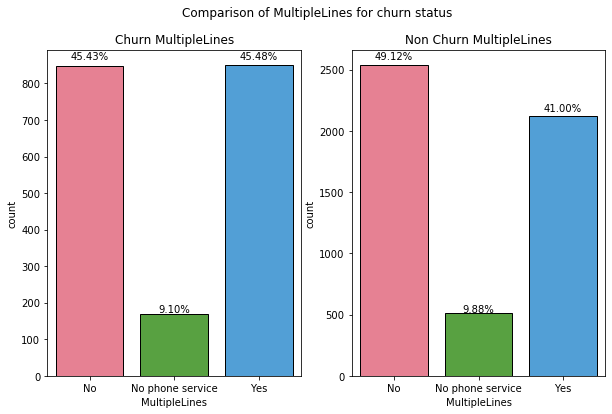

In [15]:
# here we can see that people with Churn status have slightly greater MultipleLines status
compare_two(
    telcom['MultipleLines'].loc[telcom['Churn'] == 'Yes'],
    telcom['MultipleLines'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of MultipleLines for churn status',
    desc1='Churn MultipleLines',
    desc2='Non Churn MultipleLines'
)

#### InternetService per churn status

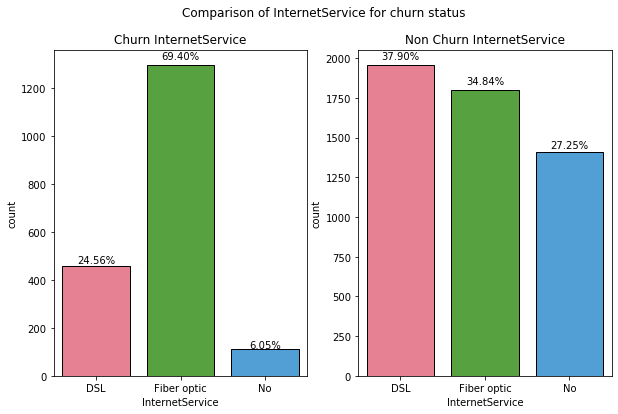

In [16]:
# here we can see that people with Churn status have less DSL and twice as much FiberOptic status
compare_two(
    telcom['InternetService'].loc[telcom['Churn'] == 'Yes'],
    telcom['InternetService'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of InternetService for churn status',
    desc1='Churn InternetService',
    desc2='Non Churn InternetService'
)

#### OnlineSecurity per churn status

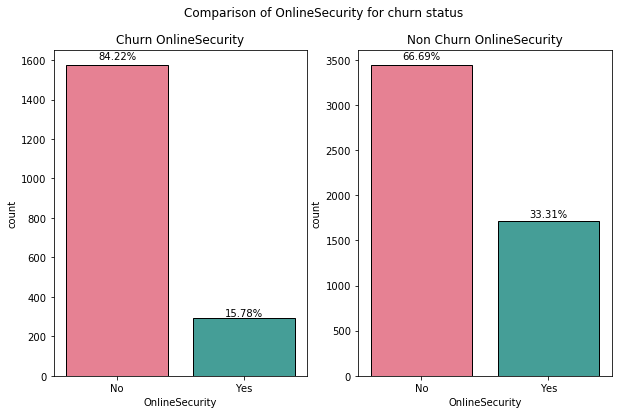

In [17]:
# here we can see that people with NonChurn status have twice as much OnlineSecurity than Churn ones
compare_two(
    telcom['OnlineSecurity'].loc[telcom['Churn'] == 'Yes'],
    telcom['OnlineSecurity'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of OnlineSecurity for churn status',
    desc1='Churn OnlineSecurity',
    desc2='Non Churn OnlineSecurity'
)

#### OnlineBackup per churn status

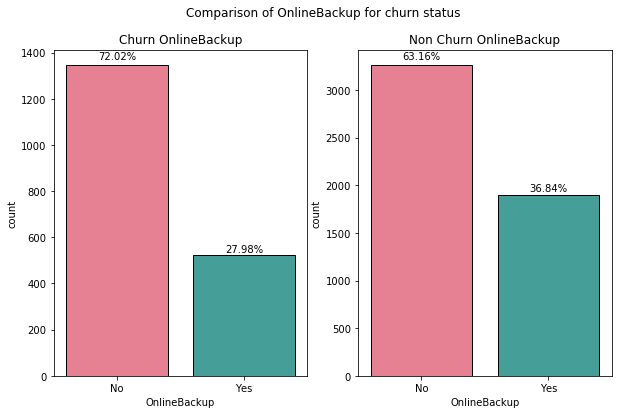

In [18]:
# here we can see that people with Churn status have less OnlineBackup status than NonChurn ones
compare_two(
    telcom['OnlineBackup'].loc[telcom['Churn'] == 'Yes'],
    telcom['OnlineBackup'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of OnlineBackup for churn status',
    desc1='Churn OnlineBackup',
    desc2='Non Churn OnlineBackup'
)

#### DeviceProtection per churn status

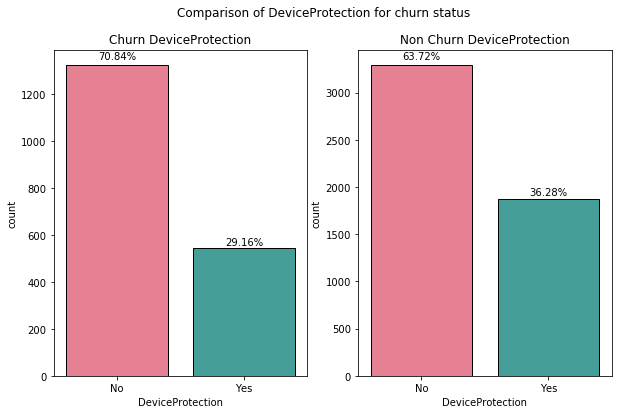

In [19]:
# here we can see that people with Churn status have less DeviceProtection than NonChurn ones
compare_two(
    telcom['DeviceProtection'].loc[telcom['Churn'] == 'Yes'],
    telcom['DeviceProtection'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of DeviceProtection for churn status',
    desc1='Churn DeviceProtection',
    desc2='Non Churn DeviceProtection'
)

#### TechSupport per churn status

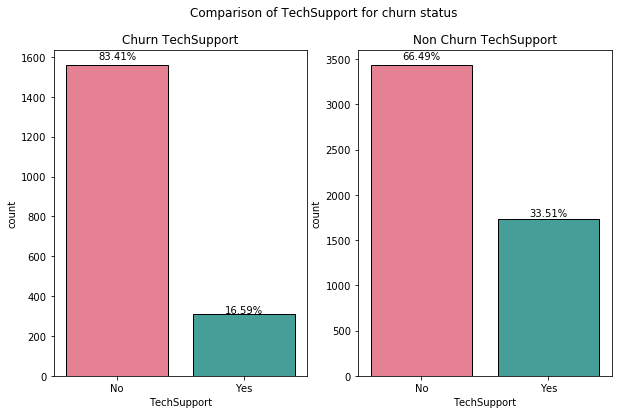

In [20]:
# here we can see that people with NonChurn status have twice as much TechSupport than Churn ones
compare_two(
    telcom['TechSupport'].loc[telcom['Churn'] == 'Yes'],
    telcom['TechSupport'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of TechSupport for churn status',
    desc1='Churn TechSupport',
    desc2='Non Churn TechSupport'
)

#### StreamingTV per churn status

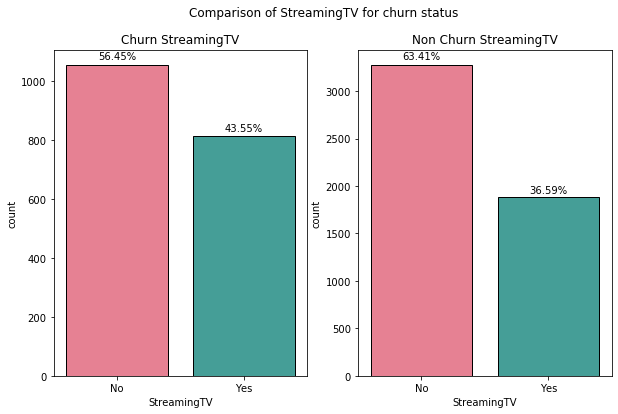

In [21]:
# here we can see that people with Churn status have greater StreamingTV status than NonChurn ones
compare_two(
    telcom['StreamingTV'].loc[telcom['Churn'] == 'Yes'],
    telcom['StreamingTV'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of StreamingTV for churn status',
    desc1='Churn StreamingTV',
    desc2='Non Churn StreamingTV'
)

#### StreamingMovies per churn status

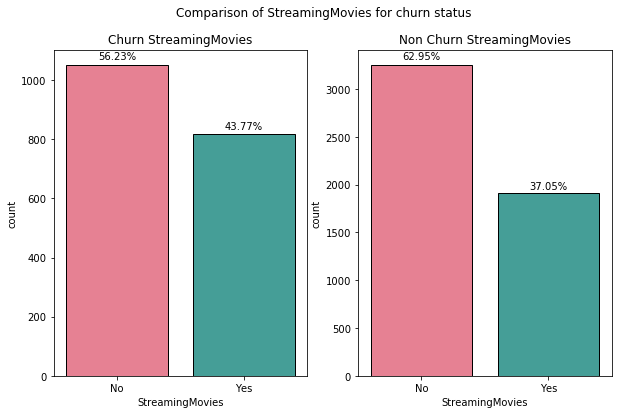

In [22]:
# here we can see that people with Churn status have greater StreamingMovies status than NonChurn ones
compare_two(
    telcom['StreamingMovies'].loc[telcom['Churn'] == 'Yes'],
    telcom['StreamingMovies'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of StreamingMovies for churn status',
    desc1='Churn StreamingMovies',
    desc2='Non Churn StreamingMovies'
)

#### Contract per churn status

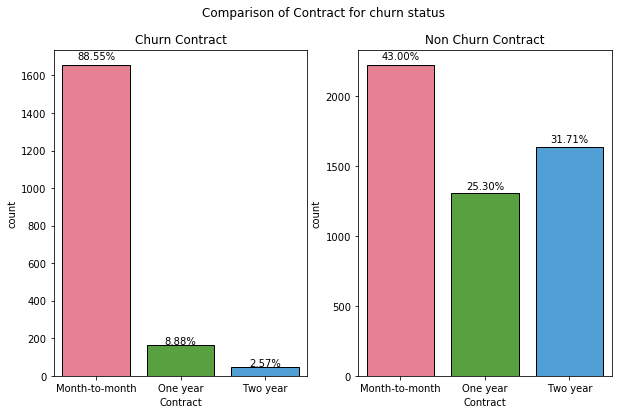

In [23]:
# here we can see that people with Churn status have twice as much Month-to-month conract type than NonChurn ones and hardly
# no one has two year one and just a little bit of one year contract
compare_two(
    telcom['Contract'].loc[telcom['Churn'] == 'Yes'],
    telcom['Contract'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of Contract for churn status',
    desc1='Churn Contract',
    desc2='Non Churn Contract'
)

#### PaperlessBilling per churn status

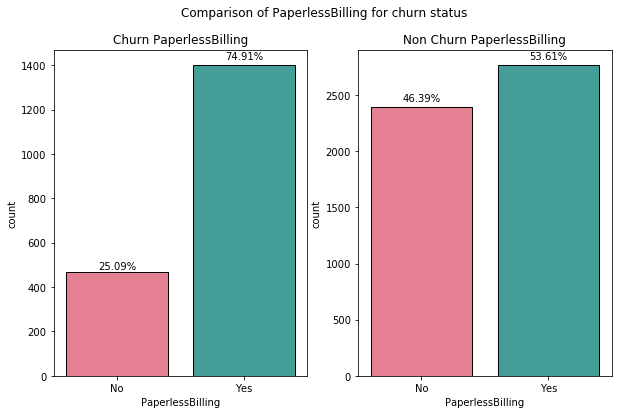

In [24]:
# here we can see that people with Churn status have greater PaperlessBilling than NonChurn ones
compare_two(
    telcom['PaperlessBilling'].loc[telcom['Churn'] == 'Yes'],
    telcom['PaperlessBilling'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of PaperlessBilling for churn status',
    desc1='Churn PaperlessBilling',
    desc2='Non Churn PaperlessBilling'
)

#### PaymentMethod per churn status

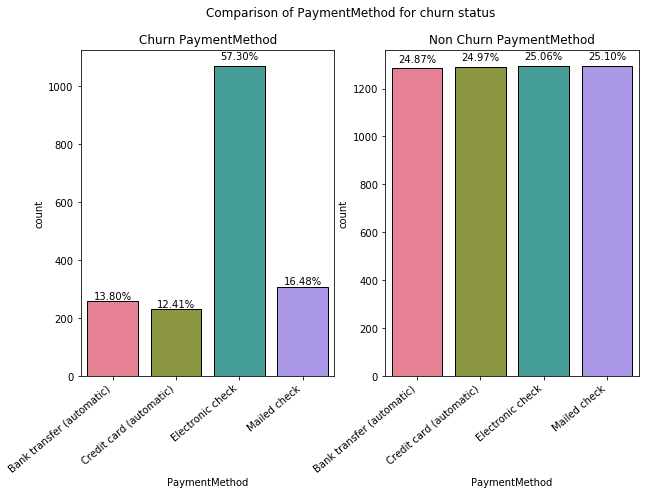

In [25]:
# here we can see that people with Churn status the most frequently pay with Electronic Check comparing to NonChurn ones
# which are spread out evenly among the PaymentMethod
compare_two(
    telcom['PaymentMethod'].loc[telcom['Churn'] == 'Yes'],
    telcom['PaymentMethod'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of PaymentMethod for churn status',
    desc1='Churn PaymentMethod',
    desc2='Non Churn PaymentMethod',
    tilted=True
)

#### tenure_group per churn status

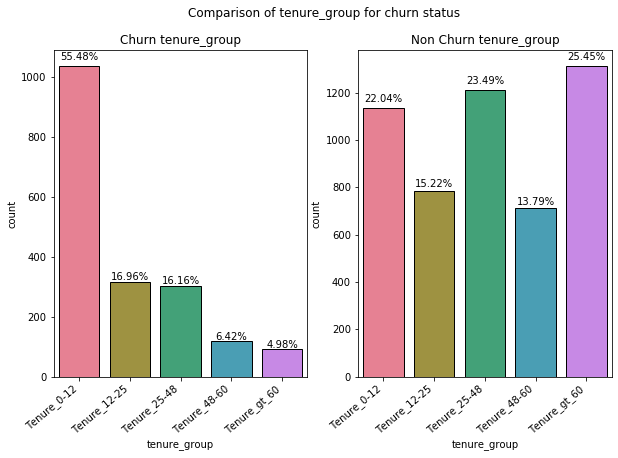

In [26]:
# here we can see that half of the people with Churn status are usually between the 0-12 tenure status with decrease
# in further groups
compare_two(
    telcom['tenure_group'].loc[telcom['Churn'] == 'Yes'],
    telcom['tenure_group'].loc[telcom['Churn'] == 'No'],
    desc_main = 'Comparison of tenure_group for churn status',
    desc1='Churn tenure_group',
    desc2='Non Churn tenure_group',
    tilted=True
)

### Continous

In [27]:
def compare_hist_cases(feature, loc='left'):
    plt.figure(figsize=(10, 8))
    hist1, bins1, bins2 = plt.hist(
        [telcom[feature].loc[telcom['Churn'] == 'Yes'],
         telcom[feature].loc[telcom['Churn'] == 'No']],
        bins='auto',
        rwidth=.85, 
        align='left', 
        label=['Churn', 'Non Churn'],
        edgecolor='black',
        color = ['#f77189', '#36ada4']
    )
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.legend(loc='upper {}'.format(loc))
    plt.title('{} in Churn vs NonChurn'.format(feature))
    plt.show()
    

#### tenure

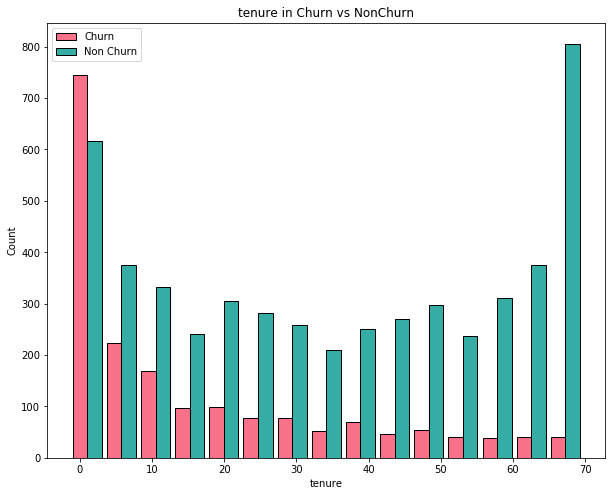

In [28]:
compare_hist_cases('tenure')

#### MonthlyCharges

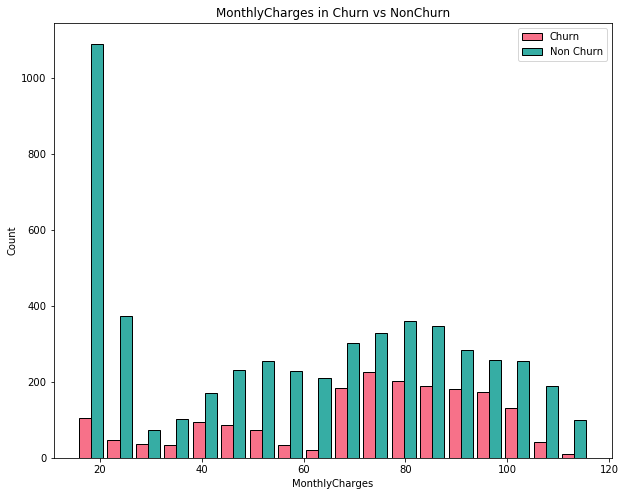

In [29]:
compare_hist_cases('MonthlyCharges', loc='right')

#### TotalCharges

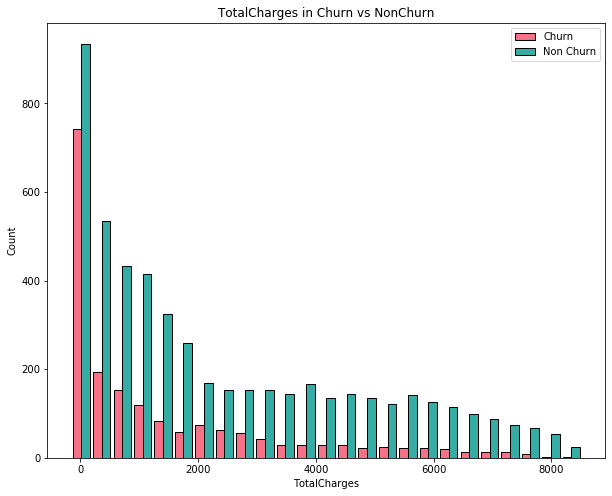

In [30]:
compare_hist_cases('TotalCharges', loc='right')

#### tenure_group

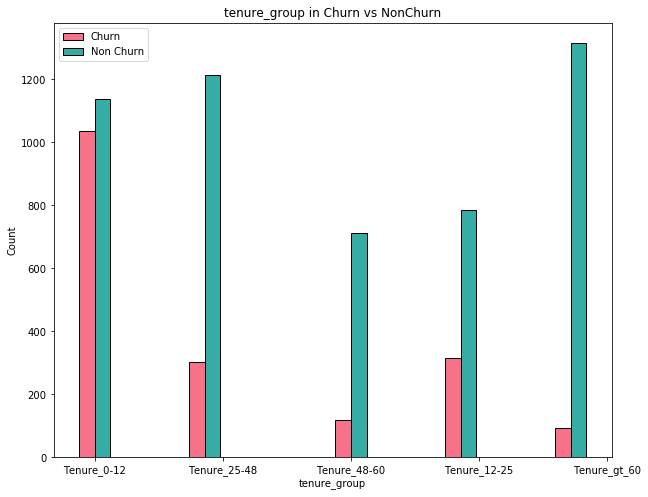

In [31]:
# We have here a lot of Churn in first tenure and a lot of NonChurn in last tenure group as seen previously
compare_hist_cases('tenure_group', loc='left')

### Pairplot for numerical values

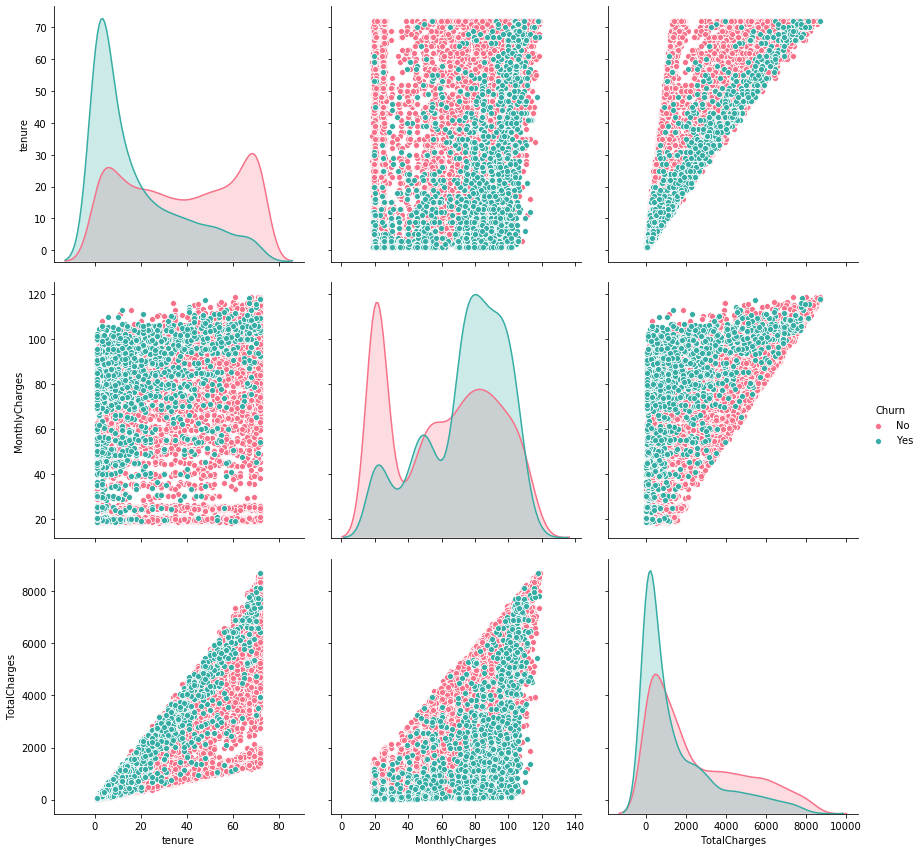

In [32]:
sns.pairplot(telcom[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', height=4, palette='husl')
plt.show()

#### MonthlyCharges per tenure_group

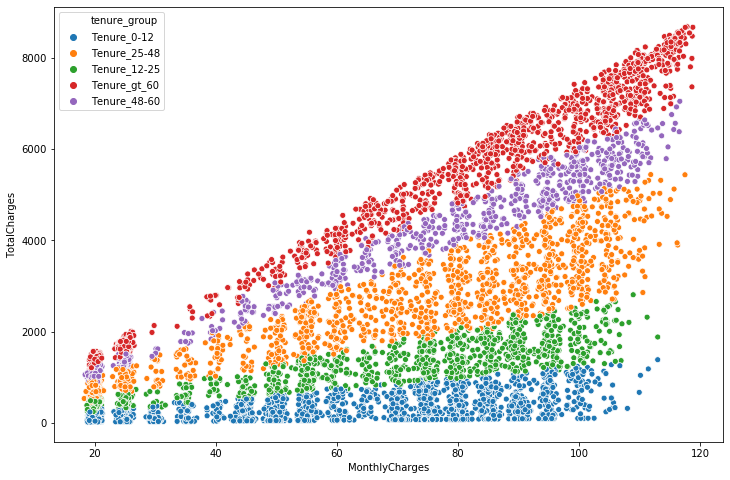

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=telcom, hue='tenure_group')
plt.show()

#### MonthlyCharges vs TotalCharges and Churn status

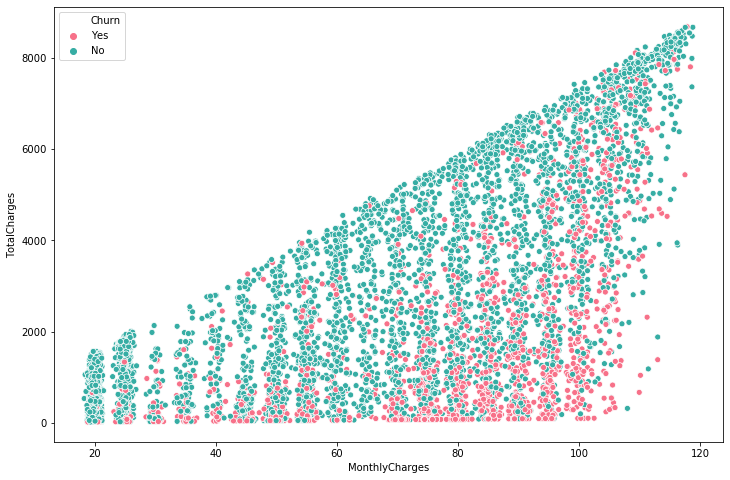

In [34]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=telcom, hue='Churn', palette='husl', hue_order=['Yes', 'No'])
plt.show()

#### Average of MonthlyCharges per tenure_group

In [35]:
averaged_df = telcom.groupby(['tenure_group', 'Churn'])[['MonthlyCharges', 'TotalCharges']].mean().reset_index()

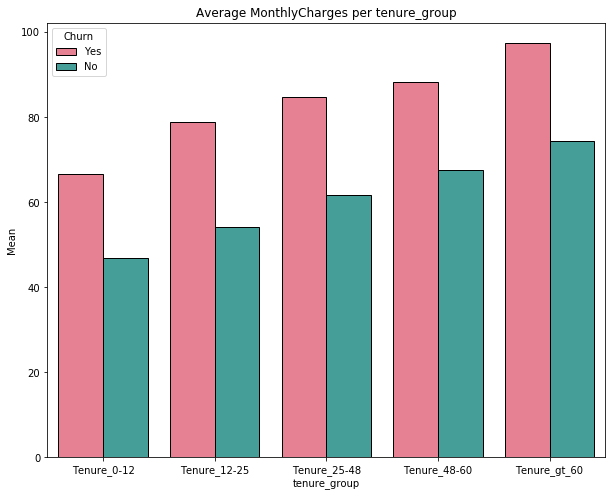

In [36]:
plt.figure(figsize=(10, 8))
plt.title('Average MonthlyCharges per tenure_group')
sns.barplot(x='tenure_group', y='MonthlyCharges', data=averaged_df, 
            palette='husl', hue='Churn', hue_order=['Yes', 'No'], edgecolor='black')
plt.ylabel('Mean')
plt.show()

#### Average of TotalCharges per tenure_group

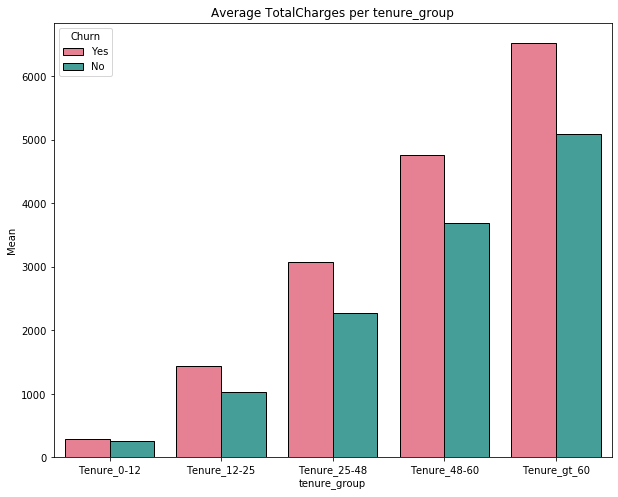

In [37]:
plt.figure(figsize=(10, 8))
plt.title('Average TotalCharges per tenure_group')
sns.barplot(x='tenure_group', y='TotalCharges', data=averaged_df, 
            palette='husl', hue='Churn', hue_order=['Yes', 'No'], edgecolor='black')
plt.ylabel('Mean')
plt.show()

### Churn status based on monthly charges and tenure

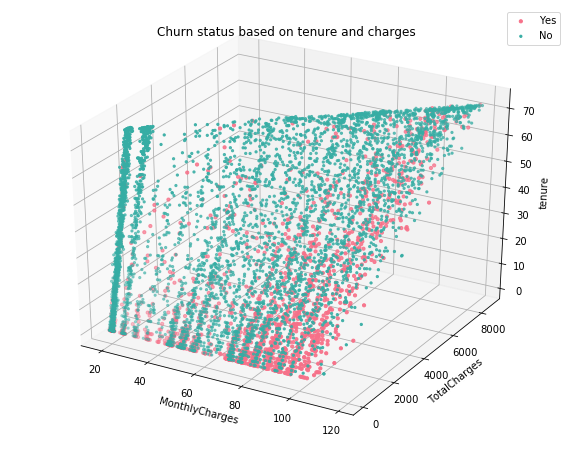

In [38]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
1
xs = telcom['MonthlyCharges']
ys = telcom['TotalCharges']
zs = telcom['tenure']
colors = {'Yes': '#f77189', 'No': '#36ada4'}
for key in colors.keys():
    ax.scatter(
        xs.loc[telcom['Churn'] == key],
        ys.loc[telcom['Churn'] == key],
        zs.loc[telcom['Churn'] == key],
        s=10 if key == 'Yes' else 5, 
        color=[colors[r] for r in telcom['Churn'] if r == key], 
        label=key)

ax.set_xlabel('MonthlyCharges')
ax.set_ylabel('TotalCharges')
ax.set_zlabel('tenure')
plt.legend()
plt.title('Churn status based on tenure and charges')

plt.show()

### Data preparation

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

id_col = ['customerID']
target_col = ['Churn']
categorical_cols = list(telcom.nunique()[telcom.nunique() < 6].keys())
categorical_cols.remove('Churn')
print('Categorical columns:\n', categorical_cols)
binary_cols = list(telcom.nunique()[telcom.nunique() == 2].keys())
print('\nBinary columns:\n', binary_cols)
multi_cols = [x for x in categorical_cols if x not in binary_cols]
print('\nMulti columns:\n', multi_cols)
numerical_cols = [x for x in telcom.columns if x not in categorical_cols + target_col + id_col]
print('\nNumerical columns:\n', numerical_cols)

Categorical columns:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']

Binary columns:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

Multi columns:
 ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'tenure_group']

Numerical columns:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


In [40]:
# Encoding
label_encoder = LabelEncoder()
for col in binary_cols:
    telcom[col] = label_encoder.fit_transform(telcom[col])

telcom = pd.get_dummies(data = telcom,columns = multi_cols )
# Scaling
std = StandardScaler()
scaled = std.fit_transform(telcom[numerical_cols])
scaled = pd.DataFrame(scaled,columns=numerical_cols)

#Merging
telcom_cp = telcom.copy()
telcom = telcom.drop(columns= numerical_cols, axis=1)
telcom = telcom.merge(scaled, left_index = True, right_index = True, how='left')

#### Preparation summary

In [41]:
summary = (telcom_cp[[i for i in telcom_cp.columns if i not in id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.round(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

summary

,feature,count,mean,std,min,25%,50%,75%,max
0,gender,7032.0,0.505,0.500,0.00,0.000,1.000,1.000,1.00
1,SeniorCitizen,7032.0,0.162,0.369,0.00,0.000,0.000,0.000,1.00
2,Partner,7032.0,0.483,0.500,0.00,0.000,0.000,1.000,1.00
3,Dependents,7032.0,0.298,0.458,0.00,0.000,0.000,1.000,1.00
4,tenure,7032.0,32.422,24.545,1.00,9.000,29.000,55.000,72.00
5,PhoneService,7032.0,0.903,0.296,0.00,1.000,1.000,1.000,1.00
6,OnlineSecurity,7032.0,0.287,0.452,0.00,0.000,0.000,1.000,1.00
7,OnlineBackup,7032.0,0.345,0.475,0.00,0.000,0.000,1.000,1.00
8,DeviceProtection,7032.0,0.344,0.475,0.00,0.000,0.000,1.000,1.00
9,TechSupport,7032.0,0.290,0.454,0.00,0.000,0.000,1.000,1.00


#### Correlation Matrix

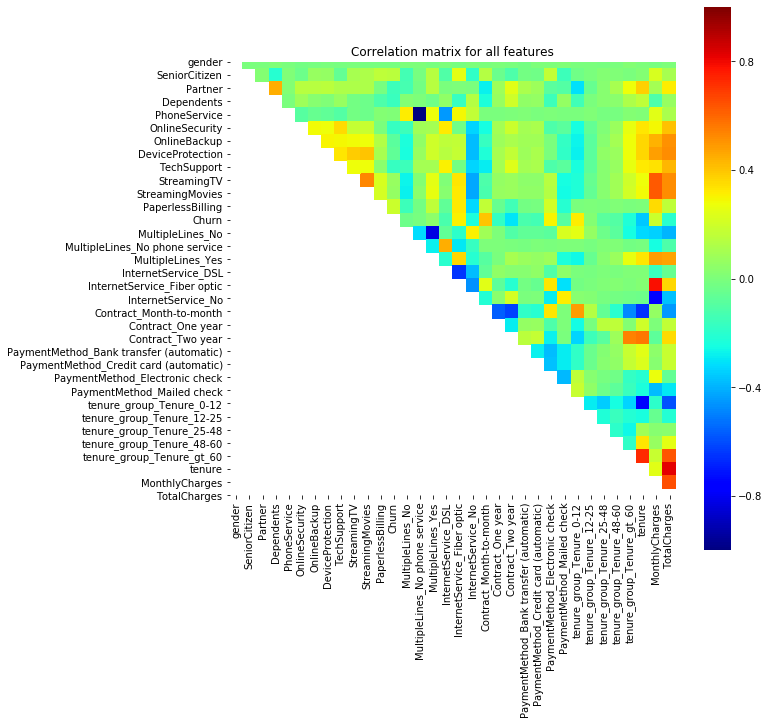

In [42]:
correlations = telcom.corr()
mask = np.zeros_like(correlations)
mask[np.tril_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(correlations, mask=mask, cmap='jet', square=True)
plt.title('Correlation matrix for all features')
plt.show()

#### PCA visualisation for 2 components

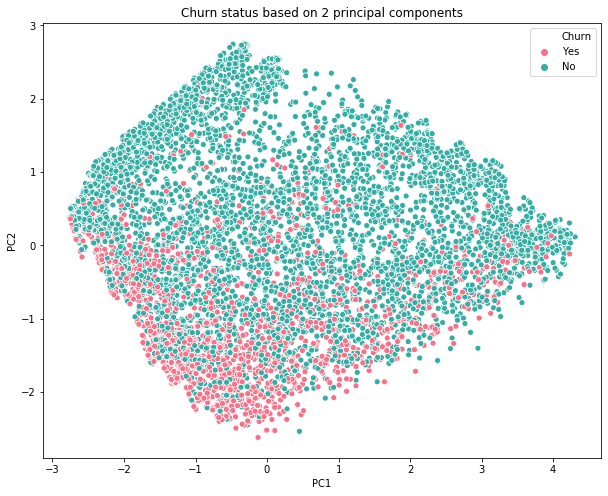

Explained variance for 2 components:  0.5


In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X = telcom[[i for i in telcom.columns if i not in id_col + target_col]]
Y = telcom[target_col + id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns = ['PC1', 'PC2'])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how='left')
pca_data['Churn'] = pca_data['Churn'].replace({1 : 'Yes', 0 : 'No'})
             
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_data, hue='Churn', palette='husl', hue_order=['Yes', 'No'])
plt.title('Churn status based on 2 principal components')
plt.show()
print('Explained variance for 2 components: ', round(sum(pca.explained_variance_ratio_), 3))

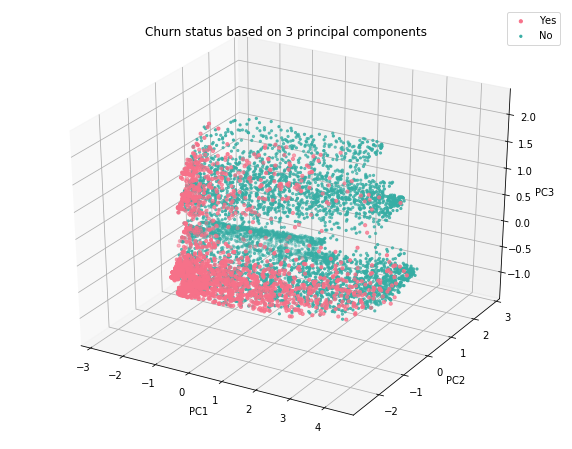

Explained variance for 3 components:  0.556


In [44]:
from mpl_toolkits.mplot3d import axes3d, Axes3D


pca = PCA(n_components = 3)

X = telcom[[i for i in telcom.columns if i not in id_col + target_col]]
Y = telcom[target_col + id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns = ['PC1', 'PC2', 'PC3'])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how='left')
pca_data['Churn'] = pca_data['Churn'].replace({1 : 'Yes', 0 : 'No'})



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs = pca_data['PC1']
ys = pca_data['PC2']
zs = pca_data['PC3']
colors = {'Yes': '#f77189', 'No': '#36ada4'}
for key in colors.keys():
    ax.scatter(
        xs.loc[pca_data['Churn'] == key],
        ys.loc[pca_data['Churn'] == key],
        zs.loc[pca_data['Churn'] == key],
        s=10 if key == 'Yes' else 5, 
        color=[colors[r] for r in pca_data['Churn'] if r == key], 
        label=key)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.title('Churn status based on 3 principal components')

plt.show()
print('Explained variance for 3 components: ', round(sum(pca.explained_variance_ratio_), 3))

### Building model

In [45]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score ,roc_curve, scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.utils.multiclass import unique_labels

# splitting data
train, test = train_test_split(telcom, test_size = .2)

features    = [i for i in telcom.columns if i not in id_col + target_col]
X_train = train[features]
Y_train = train[target_col]
X_test  = test[features]
Y_test  = test[target_col]


def telecom_churn_prediction(model, 
                             train_x, test_x, 
                             train_y, test_y, 
                             features, coeffs):
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    probabilities = model.predict_proba(test_x)
        
#     TODO: display this nicely    
#     if coeffs == 'coefficients':
#         coefficients  = pd.DataFrame(model.coef_.ravel())
#     elif coeffs == 'features':
#         coefficients  = pd.DataFrame(model.feature_importances_) # for Tree-based

#     features_df = pd.DataFrame(features)
#     coef_summary = pd.merge(coefficients, features_df, left_index= True, right_index= True, how = 'left')
#     coef_summary.columns = ['coefficients', 'features']
#     coef_summary = coef_summary.sort_values(by = 'coefficients', ascending = False)
    
    print('\nClassification report:\n', classification_report(test_y, predictions))
    print('Accuracy Score:', round(accuracy_score(test_y, predictions), 3))

    
    model_roc_auc = roc_auc_score(test_y, predictions) 
    fpr, tpr, thresholds = roc_curve(test_y, probabilities[:,1])
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, '-', c='#36ada4', label='ROC curve')
    plt.plot(np.linspace(0, 1, 256), np.linspace(0, 1, 256), '--', c='#f77189')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve for binary classification')
    plt.legend()
    plt.show()
    
    print('Area under curve: ', round(model_roc_auc, 3), '\n')

#### Logistic regression


Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1030
           1       0.66      0.53      0.58       377

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407

Accuracy Score: 0.8


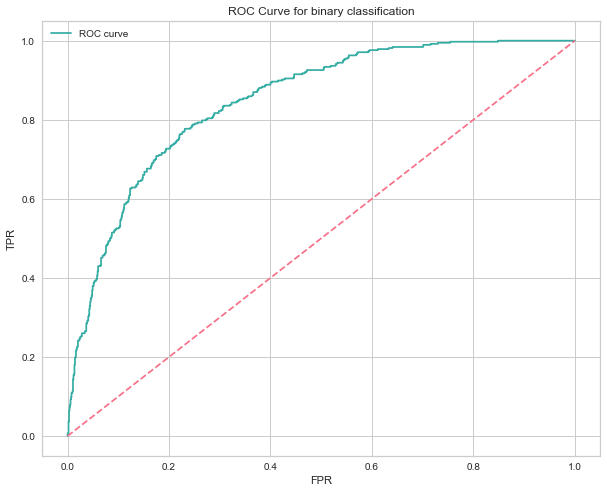

Area under curve:  0.713 



In [46]:
logit  = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)

telecom_churn_prediction(logit,
                         X_train, X_test,
                         np.ravel(Y_train),
                         np.ravel(Y_test),
                         features, 'coefficients')

### SVM Classifier

##### Linear kernel


Classification report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1030
           1       0.69      0.46      0.55       377

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407

Accuracy Score: 0.8


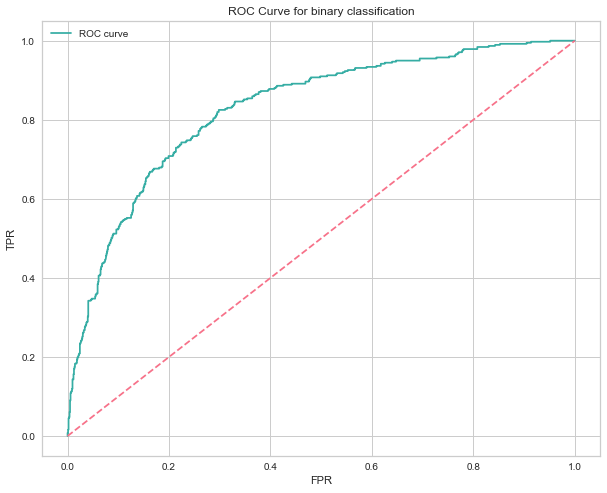

Area under curve:  0.692 



In [47]:
from sklearn.svm import SVC

svm_lin  = SVC(kernel='linear', probability=True)

telecom_churn_prediction(svm_lin,
                         X_train, X_test,
                         np.ravel(Y_train),
                         np.ravel(Y_test),
                         features, 'coefficients')

#### Random Forest Classifier


Classification report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1030
           1       0.64      0.51      0.57       377

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy Score: 0.79


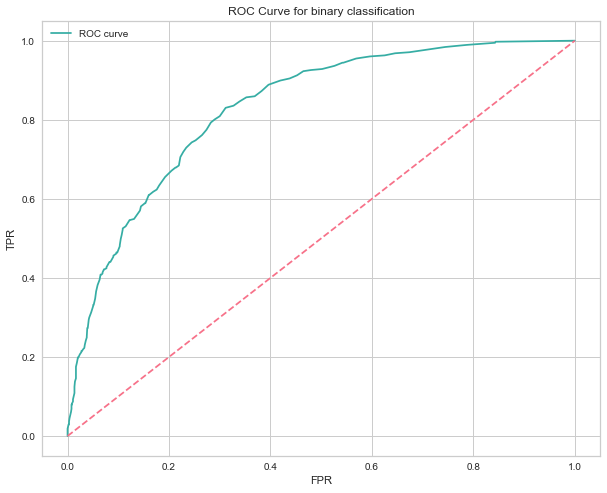

Area under curve:  0.701 



In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)


telecom_churn_prediction(rf_clf,
                         X_train, X_test,
                         np.ravel(Y_train),
                         np.ravel(Y_test),
                         features, 'features')

#### KNN classifier



Classification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1030
           1       0.63      0.46      0.54       377

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Accuracy Score: 0.784


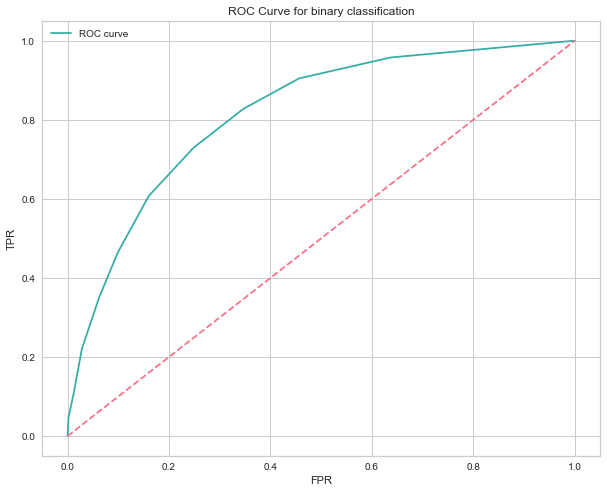

Area under curve:  0.683 



In [49]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=10)

telecom_churn_prediction(knn,
                         X_train, X_test,
                         np.ravel(Y_train),
                         np.ravel(Y_test),
                         features, 'coefficients')

In [50]:
# What could be addded/improved?
# * add alidation set ie K-folds
# * make use of SMOTE for Churn case
# * feature selections and re running models
# * tuning hyperparameters of the models